# Proton Aurorae on Mars
Reference Deighan et al. 2018 https://lasp.colorado.edu/home/maven/files/2018/07/Discovery-of-a-proton-aurora-at-Mars.pdf

In [1]:
#All Imports
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'../')
import numpy as np
import matplotlib
%matplotlib inline
import pylab as pl
import iuvs

In [3]:
#Load IUS data
date = '2015-04-03'
dateFits = iuvs.getData(date,'processed','limb')
dateOrbits = dateFits.keys()
print('Orbit numbers for the selected date',dateOrbits)

Orbit numbers for the selected date dict_keys([986, 984, 985])


### Reproducing Figure 1 from the paper Deighan et al. 2018

In [4]:
#Extracting emission feature information from fits 
orbit = 985
emmFeatures = dateFits[orbit][1].data.field(0)
iNdices=[0,1,2,18,21]
for iN in iNdices:
    print(iN,emmFeatures[iN])

0 H lyman-Alpha
1 OI 130.4
2 OI 135.6
18 CO Cameron
21 CO2pUVD


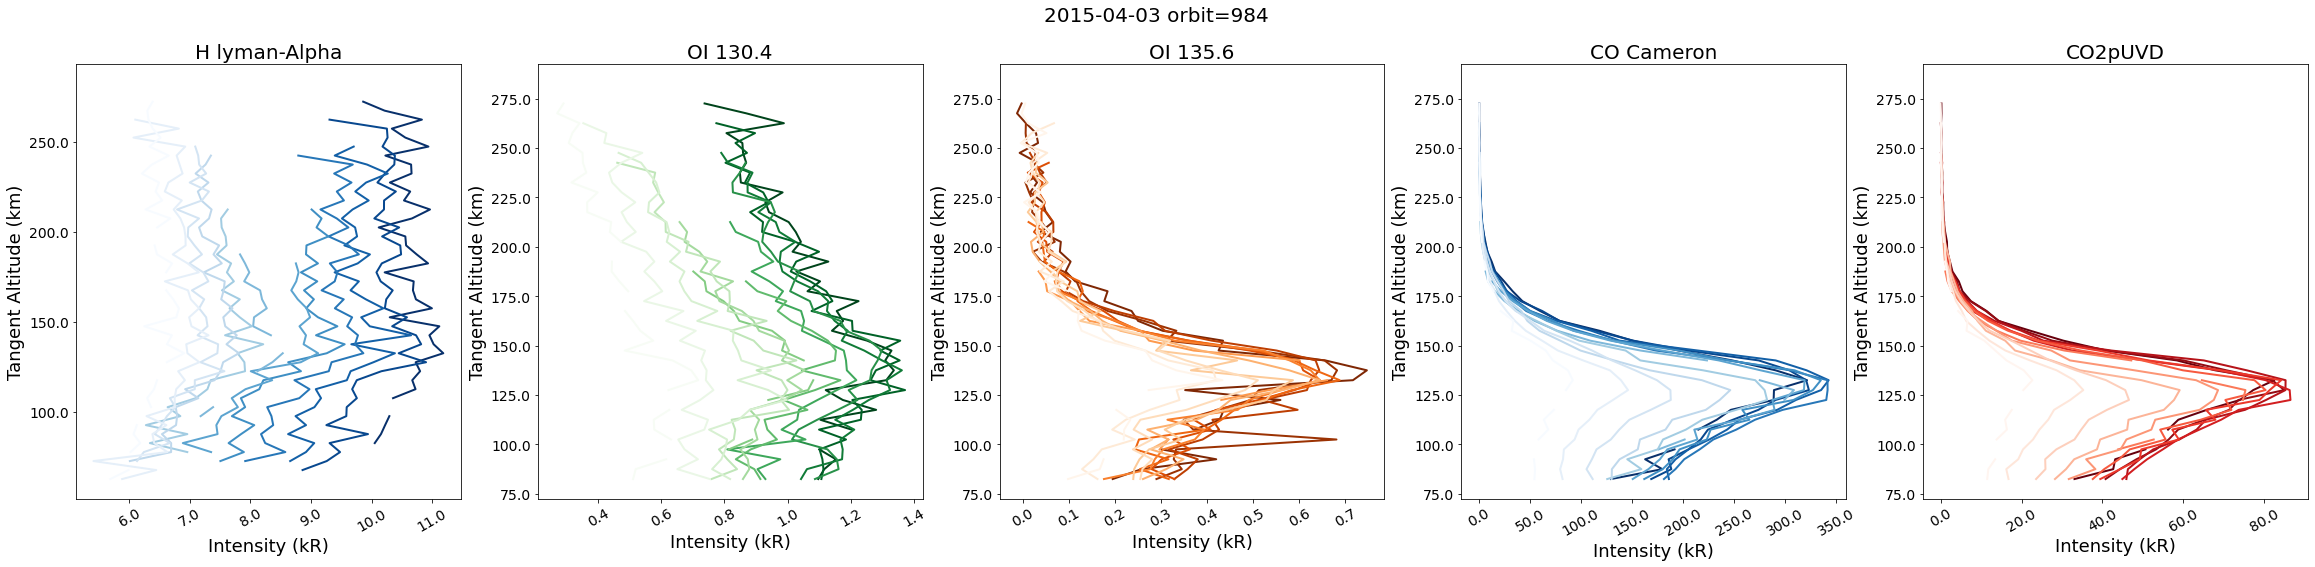

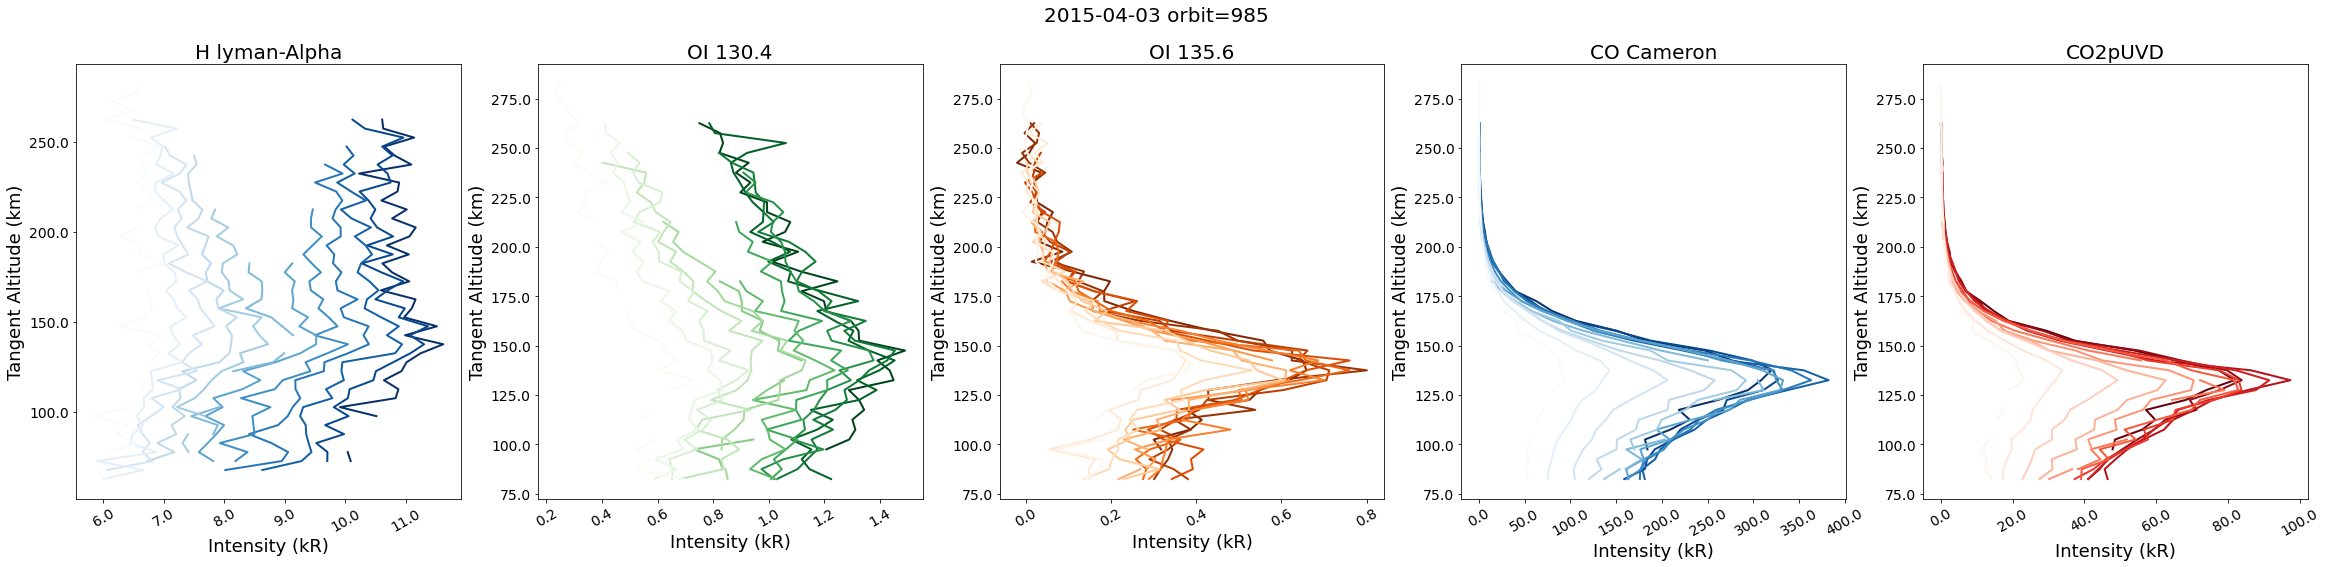

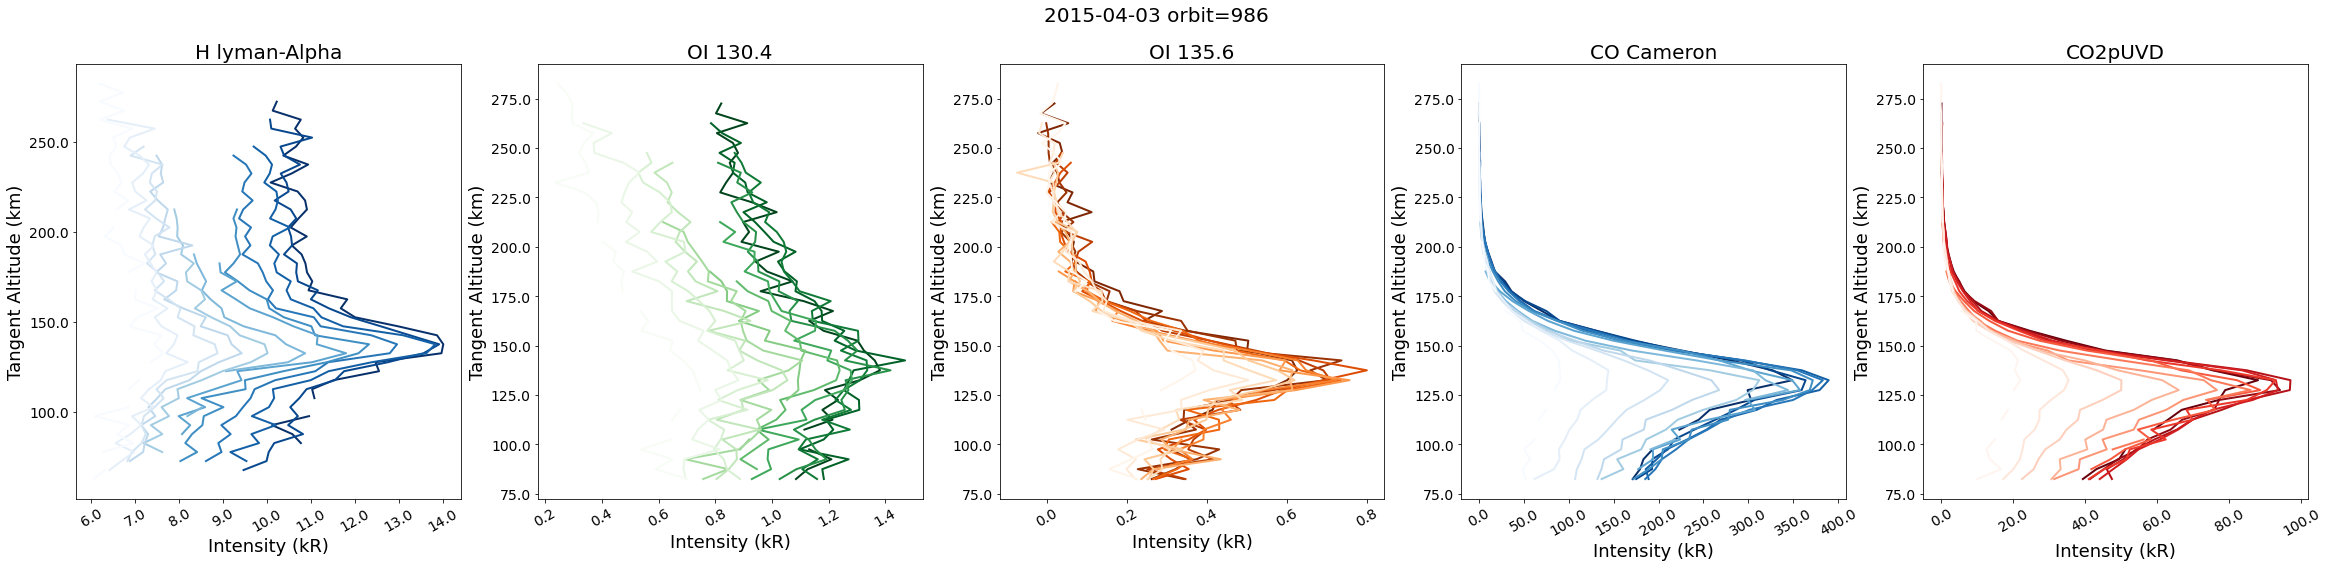

In [5]:
#Plotting altitude profile for each orbits for the above emissions
colorMaps = {}
colorMaps[0] = pl.cm.get_cmap('Blues_r', 12)
colorMaps[1] = pl.cm.get_cmap('Greens_r', 12)
colorMaps[2] = pl.cm.get_cmap('Oranges_r', 12)
colorMaps[18] = pl.cm.get_cmap('Blues_r', 12)
colorMaps[21] = pl.cm.get_cmap('Reds_r', 12)
for orbit in sorted(dateOrbits):
    thisFits = dateFits[orbit]
    TL = 20
    LB = 18
    TK = 14

    fig = pl.figure(figsize=(40,8))
    cN = 1
    for iN in iNdices:
        ax = fig.add_subplot('15%d'%cN)
        ax.set_title(emmFeatures[iN],fontsize=TL)
        for i in range(12):
            plotArr = thisFits[4].data[i][0][:,iN]
            ax.plot(plotArr,thisFits[6].data.field(0)[i],lw=2.0,color=matplotlib.colors.rgb2hex(colorMaps[iN](i)))
        ax.set_xlabel('Intensity (kR)',fontsize=LB)
        ax.set_ylabel('Tangent Altitude (km)',fontsize=LB)
        ax.set_xticklabels([str(round(item,1)) for item in ax.get_xticks()],fontsize=TK,rotation=30)
        ax.set_yticklabels([str(round(item,0)) for item in ax.get_yticks()],fontsize=TK)
        cN += 1
    pl.suptitle('%s orbit=%d'%(date,orbit),fontsize=TL)
    pl.show()

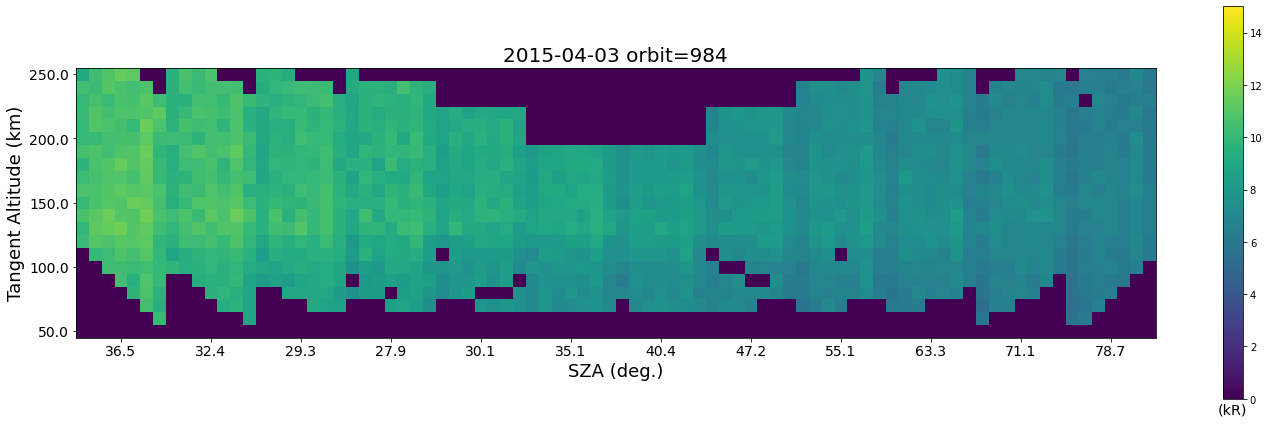

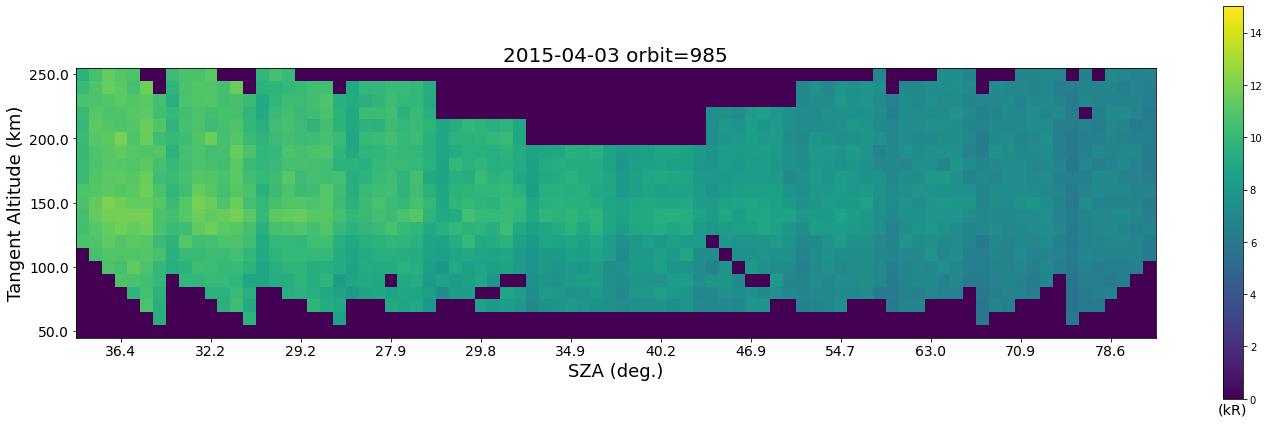

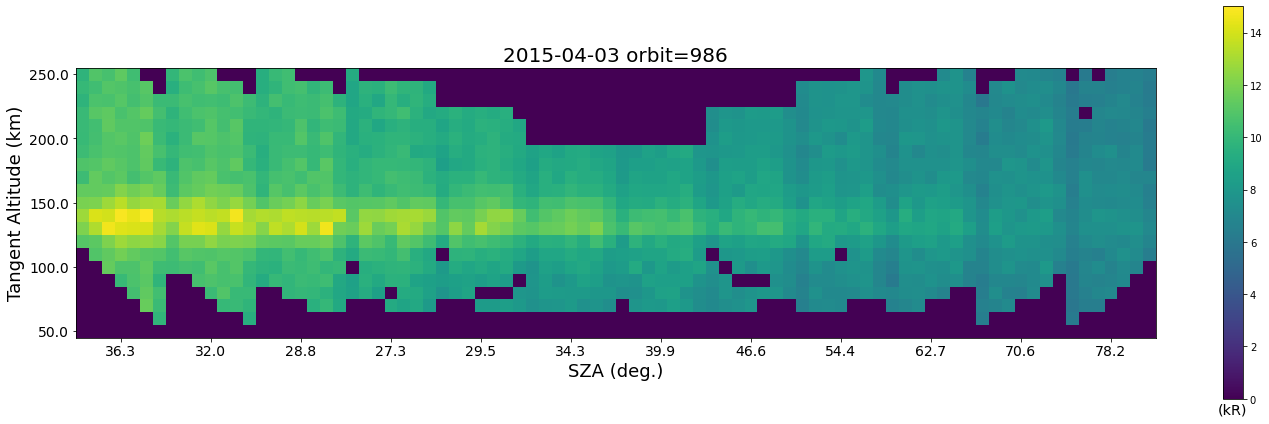

In [6]:
#Plotting SZA dependence of Ly alpha emission
for orbit in sorted(dateOrbits):
    thisFits = dateFits[orbit]   

    TL = 20
    LB = 18
    TK = 14
    nScans = 12
    nSPs = 7
    nBins = 21
    synImage = np.empty((nBins,84),dtype=np.float32)

    for sC in range(nScans):
        for sPP in range(nSPs):
            sP = nSPs-1-sPP
            altArr = thisFits[9].data.field(5)[sC,sP,-1,:]
            brgtArr = thisFits[5].data.field(0)[sC,:,sP,0]
            deltAlt = (250.0-50.0)/nBins
            altLim = np.arange(50.0,250.0+deltAlt/2.0,deltAlt)
            N,yedges=np.histogram(altArr,bins=altLim)
            meanops,yedges= np.histogram(altArr,bins=altLim,weights=brgtArr)
            N[N==0] = 1.0
            meanops /= N
            synImage[:,sC*nSPs+sPP] = np.copy(meanops)
    fig = pl.figure(figsize=(20,6))
    ax = fig.add_subplot(111)
    synImage[np.isnan(synImage)] = 0.0
    im = ax.imshow(synImage,origin='lower',vmin=0,vmax=15)
    ax.set_title('%s orbit=%d'%(date,orbit),fontsize=TL)
    xTickArr = range(3,84,7)
    xTickArrL = np.empty(len(xTickArr))
    for i in range(len(xTickArr)):
        xTickArrL[i] = np.nanmean(thisFits[6].data.field(9)[i])
    ax.set_xticks(xTickArr)
    ax.set_xticklabels([str(round(x,1)) for x in xTickArrL],fontsize=TK)
    ax.set_xlabel('SZA (deg.)',fontsize=LB)
    yTickArr = range(0,21,5)
    yTickArrL = np.arange(50.0,251.0,50.0)
    ax.set_yticks(yTickArr)
    ax.set_yticklabels([str(round(x,1)) for x in yTickArrL],fontsize=TK)
    ax.set_ylabel('Tangent Altitude (km)',fontsize=LB)
    cbar = pl.colorbar(im)
    cbar.ax.set_xlabel('(kR)',fontsize=LB*0.8)
    pl.tight_layout()
    pl.show()